# Training against iNaturalist USA cat sightings

I downloaded 5,000 medium-sized photos from the iNaturalist API, starting with this endpoint:
    
http://api.inaturalist.org/v1/observations?identified=true&photos=true&identifications=most_agree&quality_grade=research&order=desc&order_by=created_at&taxon_id=41944&place_id=1&per_page=200

Code for downloading the photos is omitted to discourage abuse of their API.

In [4]:
ls /home/jupyter/.fastai/data/inaturalist-usa-cats/images | sort -R | head -n 20

Bobcat_14037963.jpg
Bobcat_9005106.jpg
Domestic-Cat_10068710.jpg
Bobcat_15713672.jpg
Domestic-Cat_6755280.jpg
Mountain-Lion_9075705.jpg
Bobcat_17398313.jpg
Domestic-Cat_17468495.jpg
Bobcat_1184161.jpg
Bobcat_9741773.jpg
Bobcat_418273.jpg
Domestic-Cat_16080163.jpg
Domestic-Cat_13822017.jpg
Bobcat_678233.jpg
Bobcat_9631911.jpg
Bobcat_1190694.jpg
Mountain-Lion_6671368.jpg
Domestic-Cat_11599486.jpg
Bobcat_16544971.jpg
Mountain-Lion_10361864.jpg
sort: write failed: 'standard output': Broken pipe
sort: write error


In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai import *
from fastai.vision import *

In [7]:
cat_images_path = Path('/home/jupyter/.fastai/data/inaturalist-usa-cats/images')
cat_fnames = get_image_files(cat_images_path)
cat_data = ImageDataBunch.from_name_re(
    cat_images_path,
    cat_fnames,
    r'/([^/]+)_\d+.jpg$',
    ds_tfms=get_transforms(),
    size=224
)
cat_data.normalize(imagenet_stats)

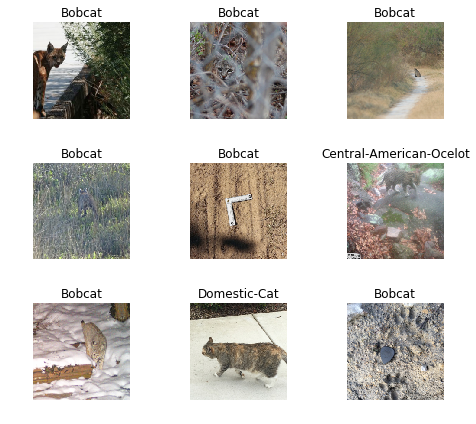

In [8]:
cat_data.show_batch(rows=3, figsize=(7,6))

In [9]:
cat_learn = ConvLearner(cat_data, models.resnet34, metrics=error_rate)

In [10]:
cat_learn.fit_one_cycle(4)

Total time: 01:25
epoch  train loss  valid loss  error_rate
1      1.760310    0.944723    0.283495    (00:26)
2      1.031575    0.740146    0.260194    (00:19)
3      0.775912    0.701504    0.245631    (00:19)
4      0.663008    0.693995    0.246602    (00:19)



In [11]:
cat_interp = ClassificationInterpretation.from_learner(cat_learn)

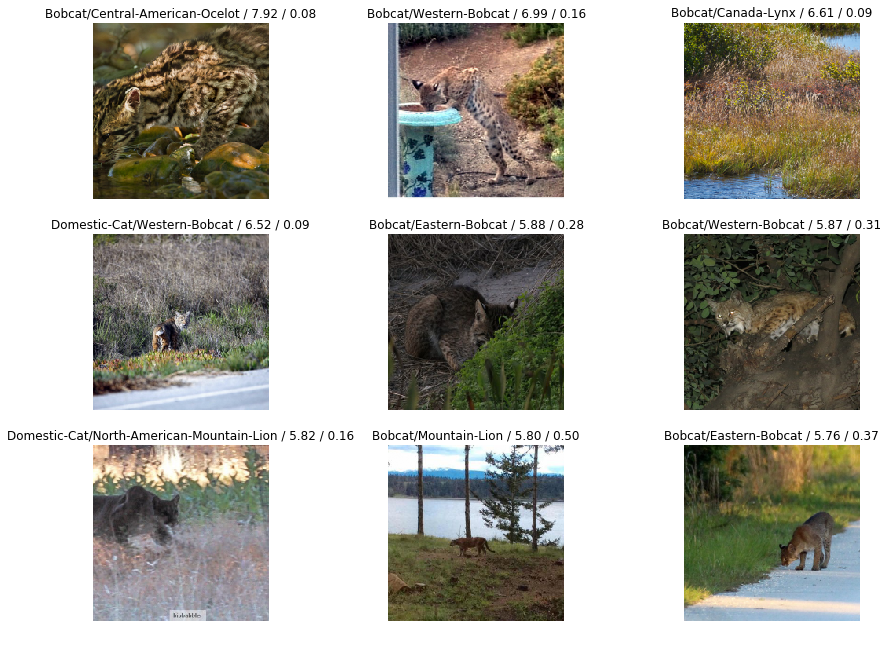

In [12]:
cat_interp.plot_top_losses(9, figsize=(15,11))

In [13]:
cat_interp.most_confused(min_val=2)

[('Mountain-Lion', 'Bobcat', 89),
 ('Domestic-Cat', 'Bobcat', 86),
 ('Bobcat', 'Domestic-Cat', 19),
 ('Bobcat', 'Mountain-Lion', 17),
 ('North-American-Mountain-Lion', 'Bobcat', 13),
 ('Eastern-Bobcat', 'Bobcat', 9),
 ('Domestic-Cat', 'Mountain-Lion', 6),
 ('Mountain-Lion', 'Domestic-Cat', 5),
 ('Western-Bobcat', 'Bobcat', 5)]

In [14]:
cat_learn.data.classes

['Bobcat',
 'Mountain-Lion',
 'Domestic-Cat',
 'Western-Bobcat',
 'Canada-Lynx',
 'North-American-Mountain-Lion',
 'Eastern-Bobcat',
 'Central-American-Ocelot',
 'Ocelot',
 'Jaguar']

In [15]:
cat_learn.save("usa-inaturalist-cats")

In [16]:
cat_learn.path, cat_learn.model_dir

(PosixPath('/home/jupyter/.fastai/data/inaturalist-usa-cats/images'), 'models')

In [17]:
ls -lah /home/jupyter/.fastai/data/inaturalist-usa-cats/images/models/

total 84M
drwxr-xr-x 2 jupyter jupyter 4.0K Oct 28 02:17 ./
drwxr-xr-x 3 jupyter jupyter 236K Oct 28 01:53 ../
-rw-r--r-- 1 jupyter jupyter  84M Oct 28 21:00 usa-inaturalist-cats.pth
